In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s3e16/sample_submission.csv
/kaggle/input/playground-series-s3e16/train.csv
/kaggle/input/playground-series-s3e16/test.csv


In [11]:
# Import all the tools we need


# Regular EDA(exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# machine learning models
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')

In [5]:
train.head(3)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9


In [6]:
def plot_rate(df, label):
    df['label'].value_counts().plot(kind='bar', cmap='summer', title='IMDb Rating');

<Axes: >

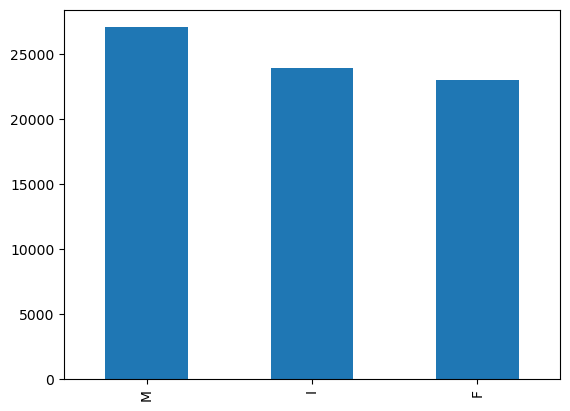

In [20]:
train.Sex.value_counts().plot(kind='bar')

In [21]:
def rplc(age):
    if age == 'M':
        age = 1
    elif age =='F':
        age = 2
    else:
        age = 3
    return age

In [22]:
train.Sex = train['Sex'].apply(rplc)

In [23]:
train.dtypes

id                  int64
Sex                 int64
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [11]:
train.isna().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [12]:
from sklearn.ensemble import RandomForestRegressor

In [24]:
train.head(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,3,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,3,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8


In [25]:
from sklearn.model_selection import train_test_split

# Set data
X = train.drop(['Age', 'id'], axis=1)
y = train['Age']
# Split the data into training and testing sets

In [26]:
np.random.seed(19)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(59240, 14811, 59240, 14811)

In [18]:
train.dtypes

id                  int64
Sex                object
Length            float64
Diameter          float64
Height            float64
Weight            float64
Shucked Weight    float64
Viscera Weight    float64
Shell Weight      float64
Age                 int64
dtype: object

In [27]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

RandomForestRegressor()

In [54]:
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_absolute_percentage_error
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error

def show_scores(model):
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    scores = {
        'training MAE': mean_absolute_error(y_train, train_preds),
        'test MAE': mean_absolute_error(y_test, test_preds),
        
        'training MAPE': mean_absolute_percentage_error(y_train, train_preds),
        'test MAPE': mean_absolute_percentage_error(y_test, test_preds),
        
        'training MSE': mean_squared_error(y_train, train_preds),
        'test MSE': mean_squared_error(y_test, test_preds),
        
        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, test_preds)
    }
    return scores


In [31]:
show_scores(rfr)

{'training MAE': 0.5416789331532748,
 'test MAE': 1.4810458443049086,
 'training MAPE': 0.05322821596032238,
 'test MAPE': 0.14517454208280967,
 'training MSE': 0.6197287137069547,
 'test MSE': 4.562081932347579,
 'Training R^2': 0.9381065659057801,
 'Valid R^2': 0.5595209880032654}

## It was all playing now try to do the real work bro.

> ## Import Data Files

In [40]:
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
submission = pd.read_csv('../input/playground-series-s3e16/sample_submission.csv')

train.shape, test.shape, submission.shape

((74051, 10), (49368, 9), (49368, 2))

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74051 entries, 0 to 74050
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              74051 non-null  int64  
 1   Sex             74051 non-null  object 
 2   Length          74051 non-null  float64
 3   Diameter        74051 non-null  float64
 4   Height          74051 non-null  float64
 5   Weight          74051 non-null  float64
 6   Shucked Weight  74051 non-null  float64
 7   Viscera Weight  74051 non-null  float64
 8   Shell Weight    74051 non-null  float64
 9   Age             74051 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 5.6+ MB


In [7]:
train.head(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8


In [18]:
test.head(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,74051,I,1.0500,0.7625,0.275,8.618248,3.657085,1.729319,2.721552
1,74052,I,1.1625,0.8875,0.275,15.507176,7.030676,3.246018,3.968930


In [9]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


## Data Description
These are the descriptions of the variables in this dataset:

    Sex: Gender of the Crab - Male, Female and Indeterminate
    Length: Length of the Crab in feet
    Diameter: Diameter of the Crab in feet
    Height: Height of the Crab in feet
    Weight: Weight of the Crab in ounces
    Shucked Weight: Weight without the shell in ounces
    Viscera Weight: Weight that wraps around the crab's abdominal organs in ounces
    Shell Weight: Weight of the Shell in ounces
    Age: Age of the Crab in months

/tmp/ipykernel_32/1319549724.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = train.corr()


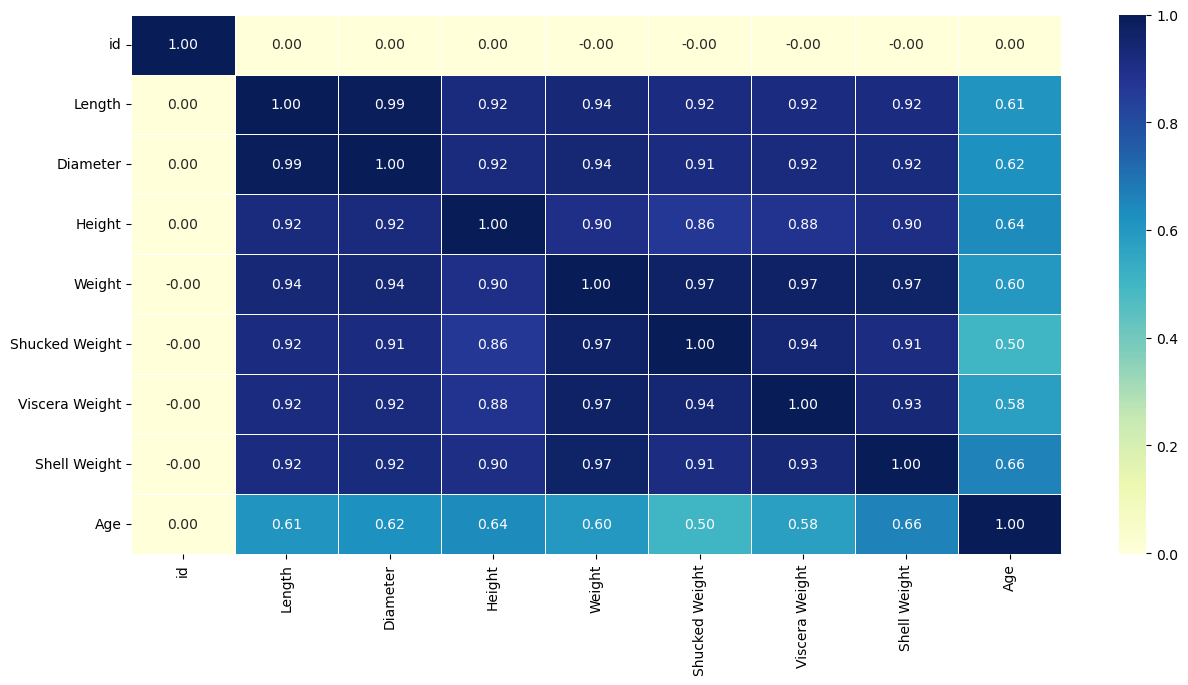

In [12]:
# Make a corelation matrix
# Make a corelation matrix
corr_matrix = train.corr()
fig, ax = plt.subplots(figsize=(15, 7))

ax = sb.heatmap(corr_matrix,
                annot=True,
                linewidths=0.5,
                fmt='.2f',
                cmap='YlGnBu')

Text(0.5, 1.0, 'Correlations Among Features (in Competition Dataset)')

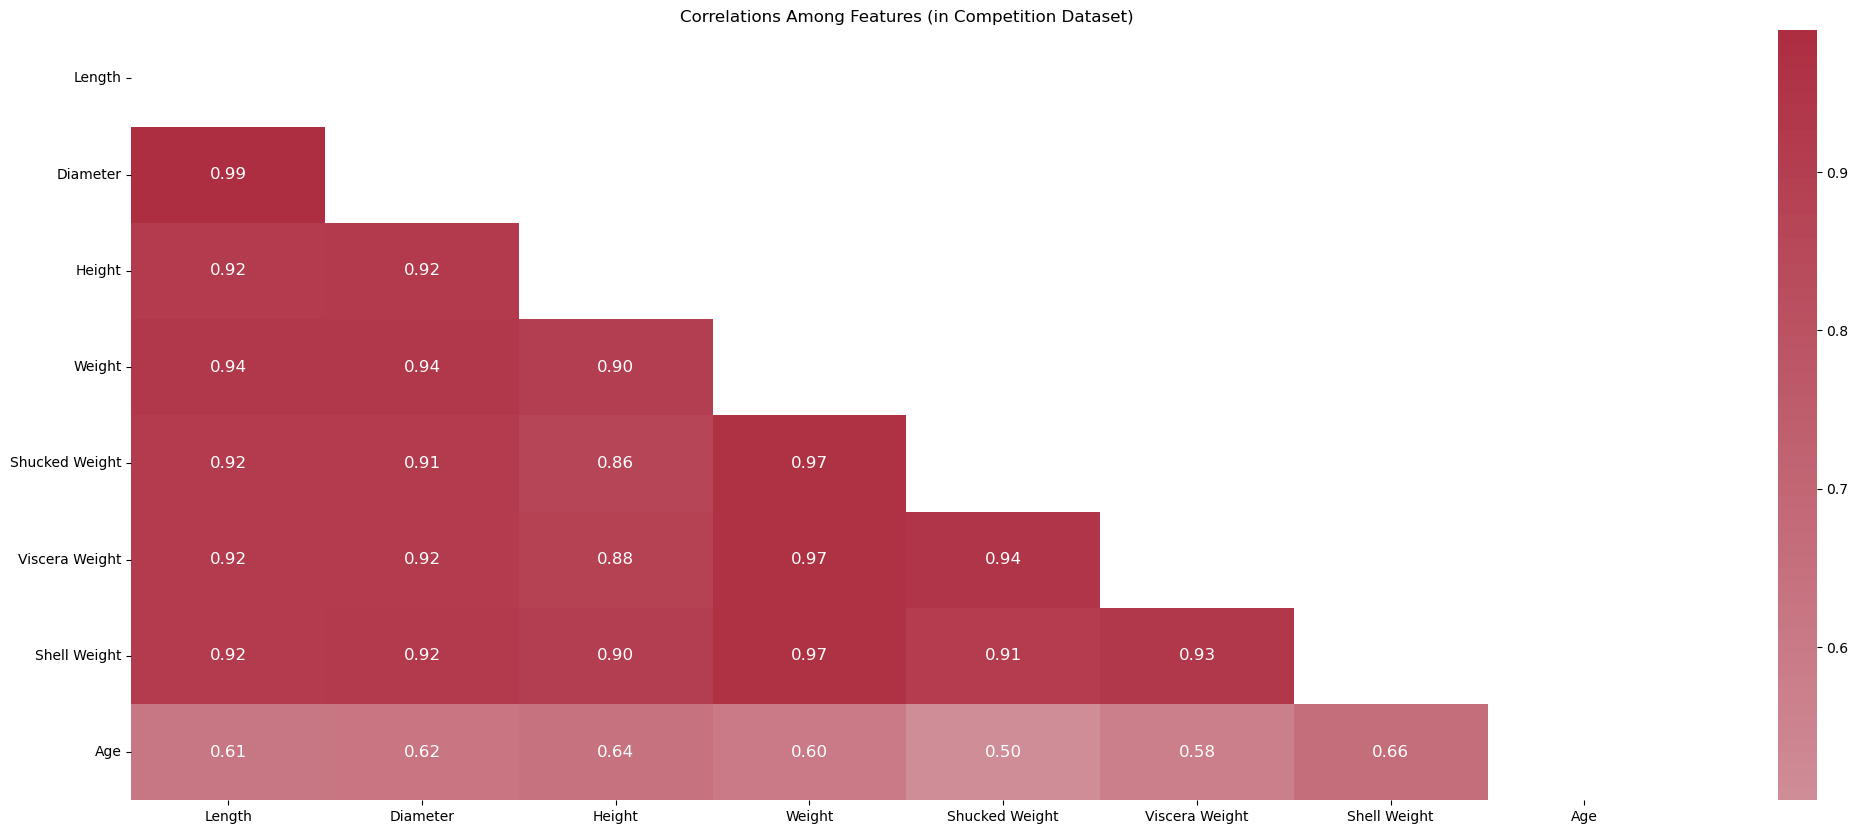

In [17]:
corr_mat_data = train.drop(columns = ['id', 'Sex'], axis = 1).corr()

data_mask = np.triu(np.ones_like(corr_mat_data, dtype = bool))

cmap = sb.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

fig, axes = plt.subplots(figsize = (25, 10))
sb.heatmap(corr_mat_data, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Features (in Competition Dataset)')

We see that `Shell Weight` is the feature that correlate the most with `Age`. On the other hand,`Shucked Weight` is the feature that correlate the least with `Age`.

## Check For Duplicate Items

In [23]:
train.shape, train.drop(columns = ['id'], axis = 1).drop_duplicates().shape

((74051, 10), (74051, 9))

In [22]:
test.shape, test.drop(columns = ['id'], axis = 1).drop_duplicates().shape

((49368, 9), (49368, 8))

## We explore the relationship between `Sex` and `Age`.

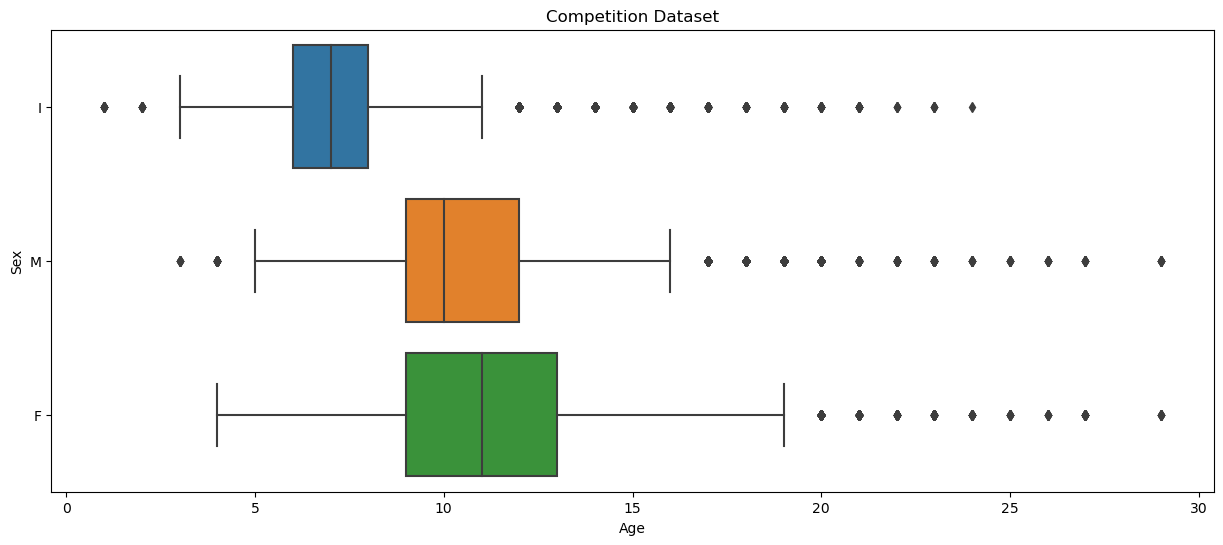

In [28]:
# train['Sex'] = pd.Categorical(train['Sex'], 
#                                  categories = ['I', 'M', 'F'], ordered = True)

fig, axes = plt.subplots(figsize = (15, 6))
sb.boxplot(data = train, x = 'Age', y = 'Sex').set_title('Competition Dataset');

Text(0.5, 1.0, 'Competition Dataset')

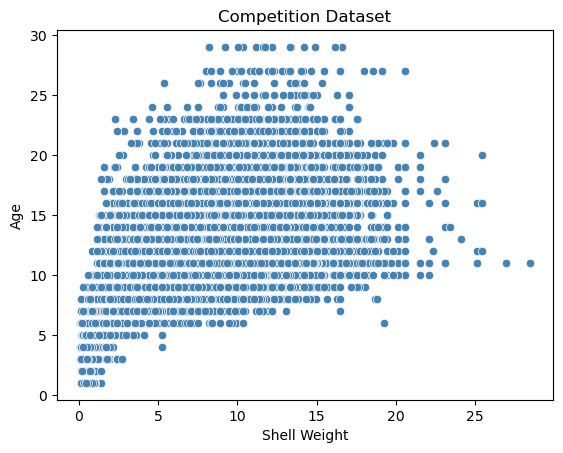

In [27]:
sb.scatterplot(data = train, x = 'Shell Weight',
                y = 'Age', color = 'steelblue').set_title('Competition Dataset')

Text(0.5, 1.0, 'Competition Dataset')

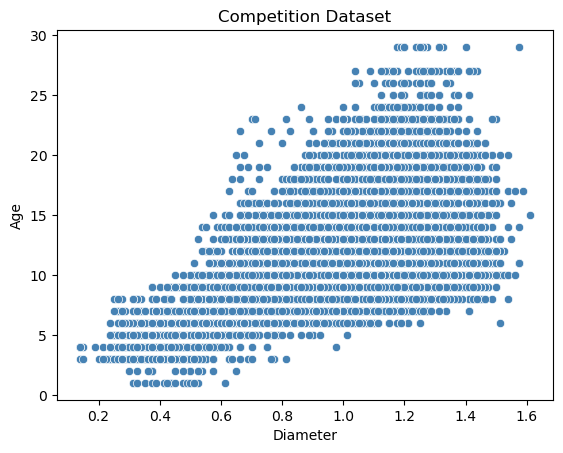

In [29]:
sb.scatterplot(data = train, x = 'Diameter',
                y = 'Age', color = 'steelblue').set_title('Competition Dataset')

## Modeling

In [48]:
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [36]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [41]:
le = LabelEncoder()
train.drop(columns = 'id', axis = 1, inplace = True)
train['Sex'] = le.fit_transform(train['Sex'])

In [42]:
train.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,0,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,1,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [43]:
X = train.drop(columns = ['Age'], axis = 1)
y = train['Age']

test_baseline = test.drop(columns = ['id'], axis = 1)
test_baseline['Sex'] = le.transform(test_baseline['Sex'])

In [59]:
test_baseline.head()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.0500,0.7625,0.2750,8.618248,3.657085,1.729319,2.721552
1,1,1.1625,0.8875,0.2750,15.507176,7.030676,3.246018,3.968930
2,0,1.2875,0.9875,0.3250,14.571643,5.556502,3.883882,4.819415
3,0,1.5500,0.9875,0.3875,28.377849,13.380964,6.548735,7.030676
4,1,1.1125,0.8500,0.2625,11.765042,5.528153,2.466407,3.331066


In [45]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(59240, 14811, 59240, 14811)

In [44]:
X.head(2)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight
0,1,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928
1,1,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940


In [50]:
y.head()

0     9
1     8
2     9
3    11
4     8
Name: Age, dtype: int64

## XGBoost

In [52]:
xgb = XGBRegressor(objective = 'reg:pseudohubererror',
                          colsample_bytree = 0.9, 
                          gamma = 0.65, 
                          learning_rate = 0.01, 
                          max_depth = 7, 
                          min_child_weight = 20, 
                          n_estimators = 1000, 
                          subsample = 0.7)
xgb.fit(X_train, y_train)
    

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.65, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [53]:
xgb_pred_1 = xgb.predict(X_test)
xgb_pred_2 = xgb.predict(test_baseline)


In [66]:
print(xgb_pred_1[:10])
print(xgb_pred_2[:10])

[13.259935   5.411729   9.498381   7.7946405  7.0587826 11.188938
  9.657247   7.4710445  9.472092  10.730004 ]
[ 7.39839    7.6943245 10.599796   9.553904   7.5011454 12.561255
 11.036833   8.063556  12.862175   9.731131 ]


In [55]:
show_scores(xgb)

{'training MAE': 1.300280283348211,
 'test MAE': 1.3635821037583522,
 'training MAPE': 0.12271546600910063,
 'test MAPE': 0.12970557841875902,
 'training MSE': 3.963010287228729,
 'test MSE': 4.212614186456197,
 'Training R^2': 0.6058350037191422,
 'Valid R^2': 0.5866568662855443}

In [58]:

from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_absolute_error

# Define the cross-validation strategy
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and calculate MAE
mae_scores = -cross_val_score(xgb, X, y, cv=kfold, scoring='neg_mean_absolute_error')

# Calculate the average MAE score
average_mae = np.mean(mae_scores)

print('MAE scores:', mae_scores)
print('Average MAE:', average_mae)

MAE scores: [1.36389028 1.36140721 1.35772208 1.39500389 1.34471572]
Average MAE: 1.3645478370864956


## CatBoost

In [67]:
cat = CatBoostRegressor(loss_function = 'MAE',
                               iterations = 1000,
                               learning_rate = 0.08,
                               depth = 10, 
                               random_strength = 0.2,
                               bagging_temperature = 0.7,
                               border_count = 254,
                               l2_leaf_reg = 0.001,
                               verbose = False,
                               grow_policy = 'Lossguide',
                               task_type = 'CPU',
                               random_state = 42).fit(X_train, y_train)
    

In [70]:
show_scores(cat)

{'training MAE': 1.2442499418745203,
 'test MAE': 1.3569555830955828,
 'training MAPE': 0.11549636204317676,
 'test MAPE': 0.12774428397493184,
 'training MSE': 3.896794407909994,
 'test MSE': 4.303194421846096,
 'Training R^2': 0.612420901795035,
 'Valid R^2': 0.5777691028466259}

In [72]:
cat_pred_1 = cat.predict(X_test)
cat_pred_2 = cat.predict(test_baseline)


## Submission

In [74]:
submission.head()

,id,Age
0,74051,10
1,74052,10
2,74053,10
3,74054,10
4,74055,10


In [80]:
submission['Age'] = xgb_pred_2
submission.to_csv('/kaggle/working/L.csv', index = False)

In [81]:
submission.head()

,id,Age
0,74051,7.398390
1,74052,7.694324
2,74053,10.599796
3,74054,9.553904
4,74055,7.501145


In [82]:
submission.shape

(49368, 2)

## Preprocess the data

In [83]:
train = pd.read_csv('/kaggle/input/playground-series-s3e16/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e16/test.csv')
submission = pd.read_csv('../input/playground-series-s3e16/sample_submission.csv')

train.shape, test.shape, submission.shape

((74051, 10), (49368, 9), (49368, 2))

In [84]:
train.describe()

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,37025.000000,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,21376.826729,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,18512.500000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,37025.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,55537.500000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,74050.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


In [85]:
le = LabelEncoder()
train.drop(columns = 'id', axis = 1, inplace = True)
train['Sex'] = le.fit_transform(train['Sex'])

In [86]:
train.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9


In [87]:
train.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000,74051.000000
mean,1.055016,1.317460,1.024496,0.348089,23.385217,10.104270,5.058386,6.723870,9.967806
std,0.820647,0.287757,0.237396,0.092034,12.648153,5.618025,2.792729,3.584372,3.175189
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,0.000000,1.150000,0.887500,0.300000,13.437663,5.712424,2.863300,3.968930,8.000000
50%,1.000000,1.375000,1.075000,0.362500,23.799405,9.908150,4.989512,6.931453,10.000000
75%,2.000000,1.537500,1.200000,0.412500,32.162508,14.033003,6.988152,9.071840,11.000000
max,2.000000,2.012815,1.612500,2.825000,80.101512,42.184056,21.545620,28.491248,29.000000


Text(0.5, 1.0, 'Correlations Among Features (in Competition Dataset)')

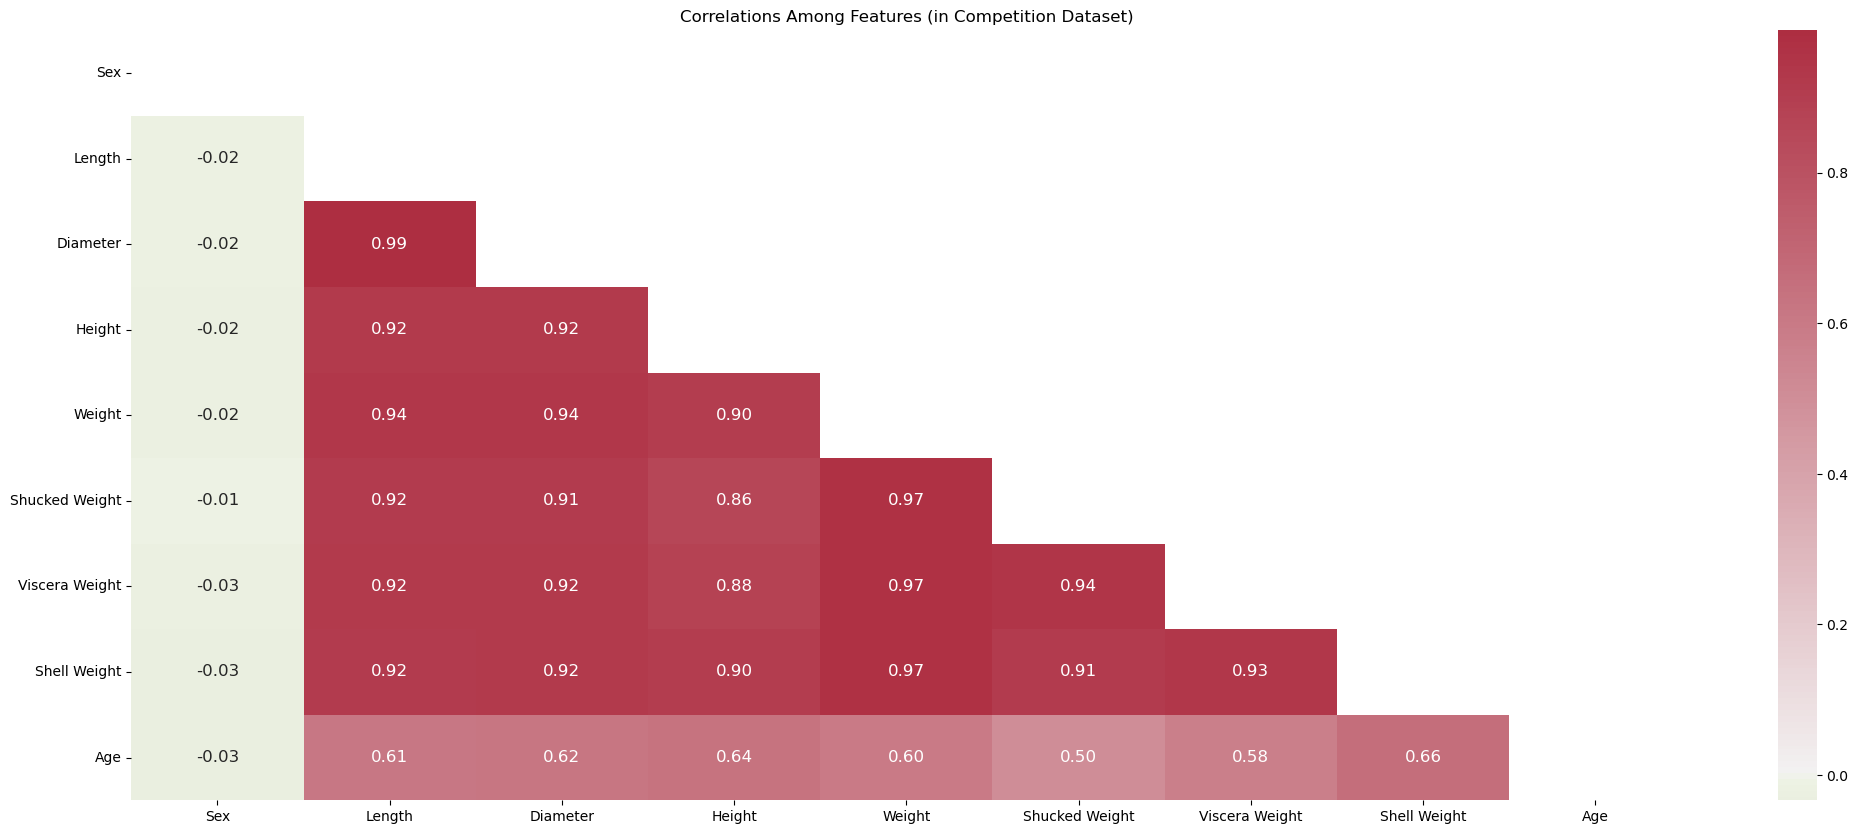

In [90]:
corr_mat_data = train.corr()

data_mask = np.triu(np.ones_like(corr_mat_data, dtype = bool))

cmap = sb.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)

fig, axes = plt.subplots(figsize = (25, 10))
sb.heatmap(corr_mat_data, annot = True, cmap = cmap, fmt = '.2f', center = 0,
            annot_kws = {'size': 12}, mask = data_mask).set_title('Correlations Among Features (in Competition Dataset)')

In [102]:
# Calculate z-scores for Length Collumn
z_scores = np.abs((train['Length'] - train['Length'].mean()) / train['Length'].std())

In [130]:
train.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight',
       'Viscera Weight', 'Shell Weight', 'Age'],
      dtype='object')

In [155]:
def remove_outlier(df, col):
    # Calculate the z-scores for the 'Desired' column
    z_scores = np.abs((df[col] - df[col].mean()) / df[col].std())

    # Define a threshold for outlier detection (e.g., z-score > 3)
    threshold = 3

    # Create a boolean mask indicating outliers
    outlier_mask = z_scores > threshold

    # Remove rows with outliers from the DataFrame
    df_cleaned = df[~outlier_mask]
    return df_cleaned

In [187]:
df_cleaned = remove_outlier(train, 'Shucked Weight')
df_cleaned.shape, train.shape

((73782, 9), (74051, 9))

In [157]:
df_cleaned = remove_outlier(df_cleaned, 'Diameter')
df_cleaned.shape, train.shape

((73422, 9), (74051, 9))

In [158]:
df_cleaned = remove_outlier(df_cleaned, 'Height')
df_cleaned.shape, train.shape

((73342, 9), (74051, 9))

In [159]:
df_cleaned = remove_outlier(df_cleaned, 'Weight')
df_cleaned.shape, train.shape

((73152, 9), (74051, 9))

In [188]:
df_cleaned = remove_outlier(df_cleaned, 'Viscera Weight')
df_cleaned.shape, train.shape

((73644, 9), (74051, 9))

In [189]:
df_cleaned = remove_outlier(df_cleaned, 'Shell Weight')
df_cleaned.shape, train.shape

((73437, 9), (74051, 9))

In [190]:
nt = df_cleaned.copy()

In [192]:
nt.head(3)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,1,1.5250,1.1750,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,1.1000,0.8250,0.275,10.418441,4.521745,2.324659,3.401940,8
2,2,1.3875,1.1125,0.375,24.777463,11.339800,5.556502,6.662133,9


In [193]:
nt.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
count,73437.000000,73437.000000,73437.000000,73437.000000,73437.000000,73437.000000,73437.000000,73437.000000,73437.000000
mean,1.054700,1.313640,1.021343,0.346733,23.098863,9.981426,4.998541,6.640383,9.940752
std,0.819044,0.285803,0.235785,0.091086,12.287855,5.451682,2.719633,3.471293,3.158562
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.042524,0.042524,1.000000
25%,0.000000,1.150000,0.887500,0.287500,13.395139,5.698250,2.849125,3.869707,8.000000
50%,1.000000,1.375000,1.075000,0.362500,23.700182,9.879801,4.932813,6.803880,10.000000
75%,2.000000,1.525000,1.200000,0.412500,32.077459,13.976304,6.959802,9.071840,11.000000
max,2.000000,2.012815,1.612500,2.825000,75.324622,26.932025,13.295915,17.222321,29.000000


In [149]:
test_baseline.describe()

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Meat Yield,Shell Ratio,Weight_to_Shucked_Weight,Viscera Ratio
count,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000,49368.000000
mean,1.049445,1.319795,1.026357,0.348693,23.464627,10.130220,5.072615,6.745876,0.334068,0.292944,2.359547,0.216816
std,0.821110,0.286950,0.236593,0.092259,12.641703,5.611779,2.791563,3.575650,0.060580,0.041271,0.310908,0.031132
min,0.000000,0.187500,0.137500,0.000000,0.056699,0.028349,0.014175,0.042524,0.080717,0.046948,0.180593,0.051643
25%,0.000000,1.162500,0.887500,0.300000,13.536886,5.740774,2.877474,3.968930,0.305221,0.267559,2.158798,0.198827
50%,1.000000,1.387500,1.075000,0.362500,23.813580,9.979024,4.989512,6.945627,0.334328,0.288873,2.314599,0.215712
75%,2.000000,1.537500,1.200000,0.412500,32.290081,14.047177,7.016501,9.171063,0.362063,0.314233,2.512725,0.233428
max,2.000000,2.037500,1.625000,2.825000,80.101512,42.184056,21.545620,28.491248,4.107011,2.567766,11.833333,2.146974


In [165]:
nt.shape

(72817, 9)

In [194]:
X =nt.drop(columns = ['Age'], axis = 1)
y = nt['Age']

In [195]:
X['Meat Yield'] = X['Shucked Weight'] / (X['Weight'] + X['Shell Weight'])
X['Shell Ratio'] = X['Shell Weight'] / X['Weight']
X['Weight_to_Shucked_Weight'] = X['Weight'] / X['Shucked Weight']
X['Viscera Ratio'] = X['Viscera Weight'] / X['Weight']

In [196]:
X.head(2)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Meat Yield,Shell Ratio,Weight_to_Shucked_Weight,Viscera Ratio
0,1,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,0.341056,0.288160,2.276169,0.229452
1,1,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,0.327179,0.326531,2.304075,0.223129


In [197]:
test_baseline = test.drop(columns = ['id'], axis = 1)
test_baseline['Sex'] = le.transform(test_baseline['Sex'])
test_baseline['Meat Yield'] = test_baseline['Shucked Weight'] / (test_baseline['Weight'] + test_baseline['Shell Weight'])
test_baseline['Shell Ratio'] = test_baseline['Shell Weight'] / test_baseline['Weight']
test_baseline['Weight_to_Shucked_Weight'] = test_baseline['Weight'] / test_baseline['Shucked Weight']
test_baseline['Viscera Ratio'] = test_baseline['Viscera Weight'] / test_baseline['Weight']

In [198]:
test_baseline.head(2)

,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Meat Yield,Shell Ratio,Weight_to_Shucked_Weight,Viscera Ratio
0,1,1.0500,0.7625,0.275,8.618248,3.657085,1.729319,2.721552,0.32250,0.315789,2.356589,0.200658
1,1,1.1625,0.8875,0.275,15.507176,7.030676,3.246018,3.968930,0.36099,0.255941,2.205645,0.209324


In [199]:
np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
len(X_train), len(X_test), len(y_train), len(y_test)

(58749, 14688, 58749, 14688)

In [202]:
xgb = XGBRegressor(objective = 'reg:pseudohubererror',
                          colsample_bytree = 0.9, 
                          gamma = 0.65, 
                          learning_rate = 0.01, 
                          max_depth = 7, 
                          min_child_weight = 20, 
                          n_estimators = 1000, 
                          subsample = 0.7)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.65, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=20, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             objective='reg:pseudohubererror', predictor=None, ...)

In [203]:
show_scores(xgb)

{'training MAE': 1.2867105397332521,
 'test MAE': 1.3535950302850448,
 'training MAPE': 0.12183456251074484,
 'test MAPE': 0.1284455810434178,
 'training MSE': 3.892963852985449,
 'test MSE': 4.171494978317445,
 'Training R^2': 0.6117375794367592,
 'Valid R^2': 0.5732608563186126}

In [200]:
cat = CatBoostRegressor(loss_function = 'MAE',
                               iterations = 1000,
                               learning_rate = 0.08,
                               depth = 10, 
                               random_strength = 0.2,
                               bagging_temperature = 0.7,
                               border_count = 254,
                               l2_leaf_reg = 0.001,
                               verbose = False,
                               grow_policy = 'Lossguide',
                               task_type = 'CPU',
                               random_state = 42).fit(X_train, y_train)

In [201]:
show_scores(cat)

{'training MAE': 1.2264060015497311,
 'test MAE': 1.3524035440860178,
 'training MAPE': 0.11428325923663976,
 'test MAPE': 0.1271029134187648,
 'training MSE': 3.8278144083374563,
 'test MSE': 4.26972238247993,
 'Training R^2': 0.618235220317237,
 'Valid R^2': 0.5632123057255464}

In [204]:
cat_pred_1 = cat.predict(X_test)
cat_pred_2 = cat.predict(test_baseline)

In [207]:
submission['Age'] = cat_pred_2
submission.to_csv('/kaggle/working/Lamda.csv', index = False)

In [208]:
submission.head()

,id,Age
0,74051,7.427424
1,74052,7.915438
2,74053,10.419670
3,74054,9.102018
4,74055,7.509610


In [211]:
cat_pred_2[:10]

array([ 7.42742402,  7.91543781, 10.41967032,  9.10201767,  7.50961025,
       12.23978165, 10.68851183,  7.95379187, 12.5156528 , 10.03706857])

In [214]:
cp = np.round(cat_pred_2).astype(int)
cp[:10]

array([ 7,  8, 10,  9,  8, 12, 11,  8, 13, 10])

In [215]:
submission['Age'] = cp

In [216]:
submission.head(2)

,id,Age
0,74051,7
1,74052,8


In [217]:

submission.to_csv('/kaggle/working/Luck.csv', index = False)